# **CRAFT **

In [1]:
# import Craft class
from craft_text_detector import Craft

# set image path and export folder directory
image_path = './data/crop.jpg'
output_dir = 'outputs/'

# create a craft instance
craft = Craft(output_dir=output_dir, crop_type="poly", cuda=False)

# apply craft text detection and export detected regions to output directory
prediction_result = craft.detect_text(image_path)

# unload models from ram/gpu
craft.unload_craftnet_model()
craft.unload_refinenet_model()

# read text from detected regions by using tesseract

c:\Users\congp\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\congp\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:252: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and may be removed in the future. Please access them via the appropriate Weights Enum instead.
  warnings.warn(
c:\Users\congp\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\congp\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight

In [3]:
import glob
from IPython.display import Image


image_paths = glob.glob('outputs/*.png')
image_paths

['outputs\\crop_link_score_heatmap.png',
 'outputs\\crop_text_detection.png',
 'outputs\\crop_text_score_heatmap.png']

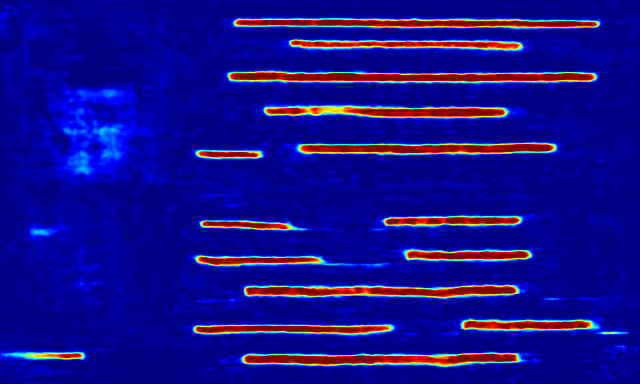

In [4]:
Image(image_paths[0])

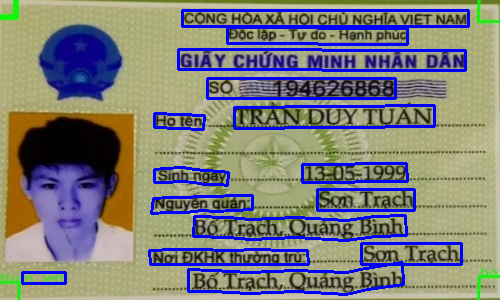

In [ ]:
Image(image_paths[1])

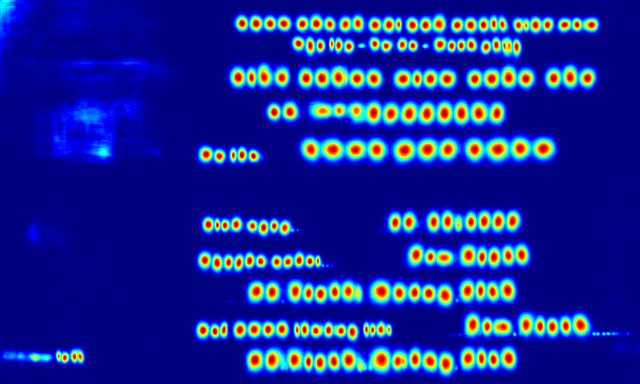

In [5]:
Image(image_paths[2])

In [6]:

import matplotlib.pyplot as plt
from PIL import Image

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

In [7]:

config = Cfg.load_config_from_name('vgg_transformer')


In [27]:
config['weights'] = './model/transformerocr.pth'
config['cnn']['pretrained']=False
config['predictor']['beamsearch']=False
config['device'] = 'cpu'
detector = Predictor(config)

c:\Users\congp\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\congp\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [25]:
import cv2
import numpy as np

In [21]:
image_paths = glob.glob('./outputs/crop_crops/*.png')

In [34]:
for i in range(len(image_paths)):
    url = "./outputs/crop_crops/crop_{}.png".format(i)
    img = cv2.imread(url)
    img = Image.fromarray(img)
    s = detector.predict(img)
    print(s)
    break

AttributeError: 'str' object has no attribute 'convert'